#### Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

#### Objective:
+ Understand the Dataset & cleanup (if required).
+ Build classification models to predict whether the cancer type is Malignant or Benign.
+ Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms

## Report


##### Import the libraries
+ import numpy as np 
+ import pandas as pd
+ import matplotlib.pyplot as plt
+ import seaborn as sns
+ import tensorflow
+ from tensorflow import keras
+ from keras.models import  Sequential
+ from keras.layers import Dense, Dropout
+ from keras.layers import BatchNormalization
+ from keras.callbacks import EarlyStopping
+ from sklearn.preprocessing import StandardScaler
+ from sklearn.metrics import accuracy_score
+ from mlxtend.plotting import plot_decision_regions


#### Loading the dataset
+ Check the dataset
+ Check the info of data
+ Check description of data


#### Data Cleaning
+ Check for the Null Values
+ Check for the duplicates 

#### Feature Selection using Recursive Feature Elimination (RFE)

#### Outliers
+ Check for the Outliers
+ Remove/ Treatment of outliers

#### Data Visualization

#### Performing train test split and Building MLP
+ Identify the Input and Output
+ Segregate the data into train and test part
+ perform preprocessing step
+ perform fit transform on train data and transform on test data

#### Important Steps in MLP
##### Create the Architecture using Sequencial
+ Crete the model 
+ specify the no of nurons and activation function like relu, sigmoid and tanh
+ Specify the input dimension

##### Model Compilation 
+ Specify the Optimizer
+ loss function:
  + For Regression: MSE, MAE, Huber loss
  + For Classification: Binary cross entropy, Categorical cross entropy
+ Specify Metrics as accuracy

##### Training the model
+ fit the X_train_trans and y_train in the model means leaning the patterns, relationship between input and output
+ Specify the batch size
+ specify the epochs and validation_split

##### MLP Evaluation and Plotting decision surfaces
+ check the prediction of X_test_trans
+ check the accuracy score
+ Try to compair the loss and val_loss using vizualization so can understand the underfitting and overfitting
+ plot the decision surface of X_train_trans, y_train
+ plot the decision surface of X_test_trans, y_test

In [177]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [119]:
df = pd.read_csv(r"E:\Excel_files\Deep Learning\breast-cancer.csv")

In [120]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
df.shape

(569, 32)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [123]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [124]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [125]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [126]:
df["diagnosis"] = df["diagnosis"].map({ "M": 1, "B": 0})

In [127]:
df["diagnosis"].unique()

array([1, 0], dtype=int64)

In [128]:
# pd.Categorical(df.diagnosis).codes

In [129]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [132]:
X = df.iloc[:,2:33]

y = df.iloc[:,1:2]

In [133]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [134]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(max_depth=2, random_state=0)
selector = RFE(estimator, n_features_to_select=6, step=1)
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selector.ranking_

C:\Users\HP PC\Desktop\dl1\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\HP PC\Desktop\dl1\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\HP PC\Desktop\dl1\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
C:\Users\HP PC\Desktop\dl1\lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed 

array([ 6, 10,  4,  1, 25, 11,  2,  1, 19, 18, 15, 16, 13,  5, 22, 24, 17,
       20, 21, 23,  1,  7,  1,  1, 12,  8,  3,  1,  9, 14])

In [135]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [136]:
df1 = pd.DataFrame({'area_mean': X["area_mean"],'concave_points_mean': X["concave points_mean"]
                    ,'radius_worst': X["radius_worst"],'perimeter_worst': X["perimeter_worst"],
                    'area_worst' : X["area_worst"],
                    'concave_points_worst' : X["concave points_worst"],
                   "diagnosis": y["diagnosis"]})

In [137]:
df1

,area_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concave_points_worst,diagnosis
0,1001.0,0.14710,25.380,184.60,2019.0,0.2654,1
1,1326.0,0.07017,24.990,158.80,1956.0,0.1860,1
2,1203.0,0.12790,23.570,152.50,1709.0,0.2430,1
3,386.1,0.10520,14.910,98.87,567.7,0.2575,1
4,1297.0,0.10430,22.540,152.20,1575.0,0.1625,1
...,...,...,...,...,...,...,...
564,1479.0,0.13890,25.450,166.10,2027.0,0.2216,1
565,1261.0,0.09791,23.690,155.00,1731.0,0.1628,1
566,858.1,0.05302,18.980,126.70,1124.0,0.1418,1
567,1265.0,0.15200,25.740,184.60,1821.0,0.2650,1


In [138]:
df1.columns

Index(['area_mean', 'concave_points_mean', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave_points_worst', 'diagnosis'],
      dtype='object')

<Axes: xlabel='concave_points_worst'>

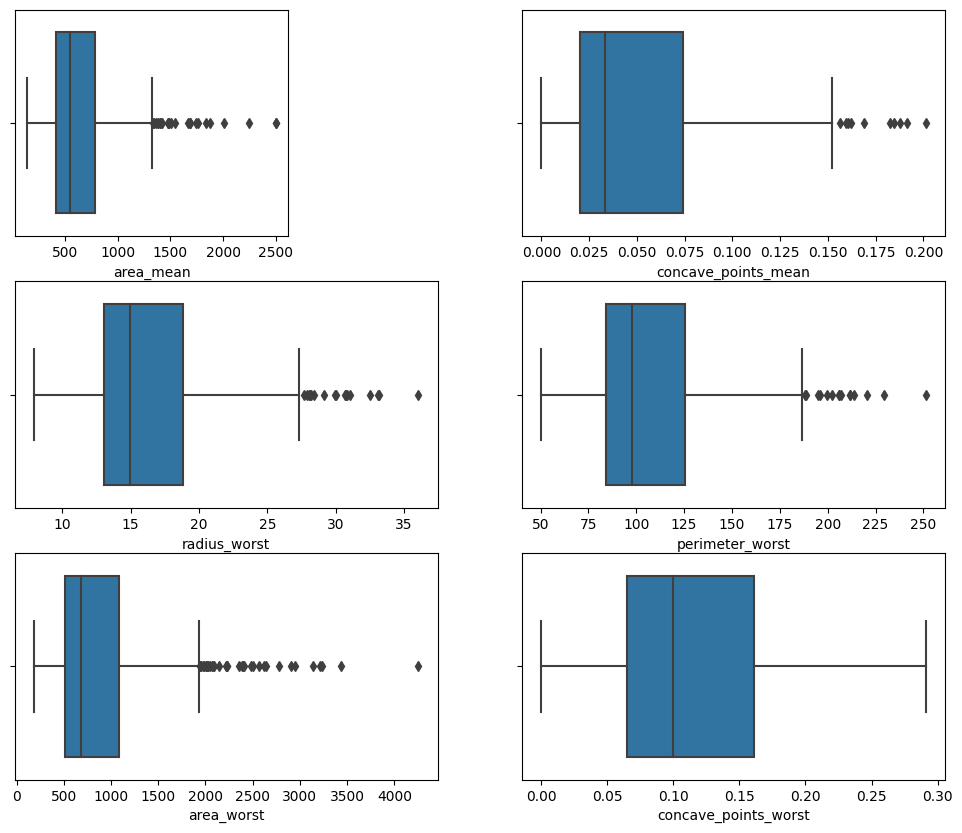

In [139]:
plt.figure(figsize = (12,10))
plt.subplot(331)
sns.boxplot(x = df1.area_mean)

plt.subplot(322)
sns.boxplot(x = df1.concave_points_mean)
 
plt.subplot(323)
sns.boxplot(x = df1.radius_worst)

plt.subplot(324)
sns.boxplot(x = df1.perimeter_worst)

plt.subplot(325)
sns.boxplot(x = df1.area_worst)

plt.subplot(326)
sns.boxplot(x = df1.concave_points_worst)




In [140]:
Q1, Q2, Q3 = tuple(df1.area_mean.quantile(q = [0.25,0.5,0.80]).values)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

494.7600000000003 1657.2000000000007 -321.84000000000043


In [141]:
df1[(df1.area_mean > UL) | (df1.area_mean < LL)].count()


area_mean               12
concave_points_mean     12
radius_worst            12
perimeter_worst         12
area_worst              12
concave_points_worst    12
diagnosis               12
dtype: int64

In [156]:
drop_list = df1[(df1.area_mean > UL) | (df1.area_mean < LL)]
df1.drop(axis=0,index=drop_list.index,inplace=True)

In [157]:
df1

,area_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concave_points_worst,diagnosis
0,1001.0,0.14710,25.380,184.60,2019.0,0.2654,1
1,1326.0,0.07017,24.990,158.80,1956.0,0.1860,1
2,1203.0,0.12790,23.570,152.50,1709.0,0.2430,1
3,386.1,0.10520,14.910,98.87,567.7,0.2575,1
4,1297.0,0.10430,22.540,152.20,1575.0,0.1625,1
...,...,...,...,...,...,...,...
564,1479.0,0.13890,25.450,166.10,2027.0,0.2216,1
565,1261.0,0.09791,23.690,155.00,1731.0,0.1628,1
566,858.1,0.05302,18.980,126.70,1124.0,0.1418,1
567,1265.0,0.15200,25.740,184.60,1821.0,0.2650,1


In [76]:
Q1, Q2, Q3 = tuple(df1.concave_points_mean.quantile(q = [0.25,0.5,0.80]).values)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

0.06394400000000003 0.18017000000000005 -0.07560600000000003


In [158]:
 df1[(df1.concave_points_mean > UL) | (df1.concave_points_mean < LL)].count()

area_mean               0
concave_points_mean     0
radius_worst            0
perimeter_worst         0
area_worst              0
concave_points_worst    0
diagnosis               0
dtype: int64

In [77]:
#drop_list = df1[(df1.concave_points_mean > UL) | (df1.concave_points_mean < LL)]
#df1.drop(axis=0,index=drop_list.index,inplace=True)

area_mean               5
concave_points_mean     5
radius_worst            5
perimeter_worst         5
area_worst              5
concave_points_worst    5
diagnosis               5
dtype: int64

In [159]:
Q1, Q2, Q3 = tuple(df1.radius_worst.quantile(q = [0.25,0.5,0.80]).values)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

6.870000000000001 30.155 2.674999999999999


In [160]:
df1[(df1.radius_worst > UL) | (df1.radius_worst < LL)].count()

area_mean               2
concave_points_mean     2
radius_worst            2
perimeter_worst         2
area_worst              2
concave_points_worst    2
diagnosis               2
dtype: int64

In [161]:
drop_list = df1[(df1.radius_worst > UL) | (df1.radius_worst < LL)]
df1.drop(axis=0,index=drop_list.index,inplace=True)

In [162]:
Q1, Q2, Q3 = tuple(df1.perimeter_worst.quantile(q = [0.25,0.5,0.80]).values)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

45.505000000000024 197.63750000000005 15.617499999999964


In [163]:
df1[(df1.perimeter_worst > UL) | (df1.perimeter_worst < LL)].count()

area_mean               1
concave_points_mean     1
radius_worst            1
perimeter_worst         1
area_worst              1
concave_points_worst    1
diagnosis               1
dtype: int64

In [165]:
drop_list = df1[(df1.perimeter_worst > UL) | (df1.perimeter_worst < LL)]
df1.drop(axis=0,index=drop_list.index,inplace=True)

In [166]:
Q1, Q2, Q3 = tuple(df1.area_worst.quantile(q = [0.25,0.5,0.80]).values)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

709.7500000000001 2287.0250000000005 -551.9750000000003


In [170]:
df1[(df1.area_worst > UL) | (df1.area_worst < LL)].count()

area_mean               0
concave_points_mean     0
radius_worst            0
perimeter_worst         0
area_worst              0
concave_points_worst    0
diagnosis               0
dtype: int64

In [168]:
drop_list = df1[(df1.area_worst > UL) | (df1.area_worst < LL)]
df1.drop(axis=0,index=drop_list.index,inplace=True)

In [171]:
df1

,area_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concave_points_worst,diagnosis
0,1001.0,0.14710,25.380,184.60,2019.0,0.2654,1
1,1326.0,0.07017,24.990,158.80,1956.0,0.1860,1
2,1203.0,0.12790,23.570,152.50,1709.0,0.2430,1
3,386.1,0.10520,14.910,98.87,567.7,0.2575,1
4,1297.0,0.10430,22.540,152.20,1575.0,0.1625,1
...,...,...,...,...,...,...,...
564,1479.0,0.13890,25.450,166.10,2027.0,0.2216,1
565,1261.0,0.09791,23.690,155.00,1731.0,0.1628,1
566,858.1,0.05302,18.980,126.70,1124.0,0.1418,1
567,1265.0,0.15200,25.740,184.60,1821.0,0.2650,1


In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_mean             550 non-null    float64
 1   concave_points_mean   550 non-null    float64
 2   radius_worst          550 non-null    float64
 3   perimeter_worst       550 non-null    float64
 4   area_worst            550 non-null    float64
 5   concave_points_worst  550 non-null    float64
 6   diagnosis             550 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 34.4 KB


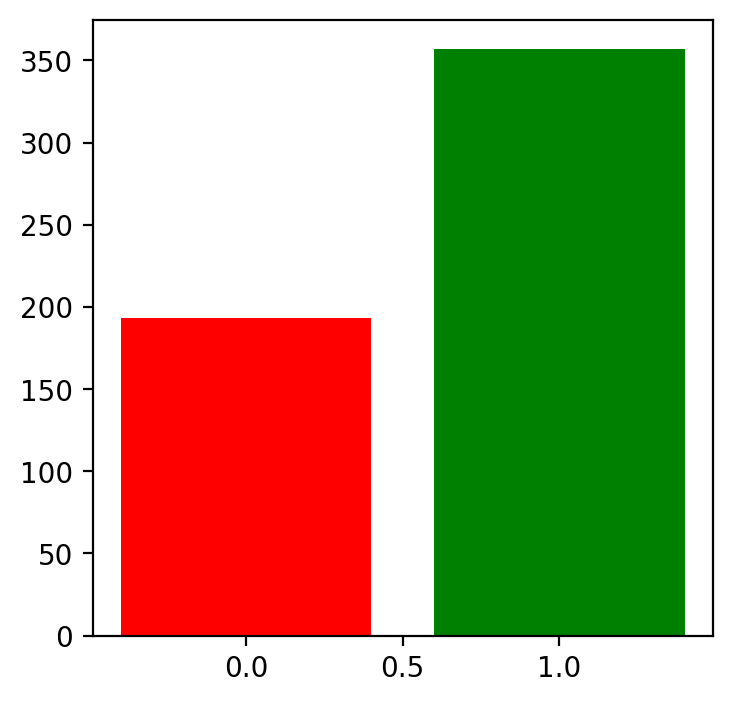

In [288]:
plt.figure(figsize=(4,4))
plt.bar(df1["diagnosis"].unique(), df1["diagnosis"].value_counts(), color = ["green","red"] )
plt.show();



In [ ]:
sns.pairplot(df1.iloc[:,:],hue='diagnosis');

In [290]:
# Performing train test split and Building MLP

In [175]:
X = df[['area_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concave points_worst']]
y = df[["diagnosis"]]

In [203]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [269]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [270]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(455, 6) (114, 6)
(455, 1) (114, 1)


In [271]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)


In [272]:
X_test_trans = std.transform(X_test)

In [273]:
model = Sequential()
model.add(Dense(8,activation='relu',kernel_initializer = 'random_uniform' ,input_dim = 6))
model.add(Dense(6,activation='relu',kernel_initializer = 'random_uniform'))
model.add(Dense(4,activation='relu',kernel_initializer = 'random_uniform'))
model.add(Dense(2,activation='relu',kernel_initializer = 'random_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [274]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 56        
                                                                 
 dense_30 (Dense)            (None, 6)                 54        
                                                                 
 dense_31 (Dense)            (None, 4)                 28        
                                                                 
 dense_32 (Dense)            (None, 2)                 10        
                                                                 
 dense_33 (Dense)            (None, 1)                 3         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [275]:
# Model Compilation and Training

In [276]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [277]:
call = EarlyStopping(monitor='val_loss',
    min_delta=0.00001,
    patience=3,
    verbose=0,
    mode='auto')

In [278]:
history=model.fit(X_train_trans,y_train,batch_size=8 ,epochs=200,validation_split=0.2, callbacks=call)

Epoch 1/200
46/46 [==============================] - 4s 17ms/step - loss: 0.6912 - accuracy: 0.5769 - val_loss: 0.6857 - val_accuracy: 0.6593
Epoch 2/200
46/46 [==============================] - 0s 8ms/step - loss: 0.6812 - accuracy: 0.6209 - val_loss: 0.6619 - val_accuracy: 0.6593
Epoch 3/200
46/46 [==============================] - 0s 8ms/step - loss: 0.6406 - accuracy: 0.6209 - val_loss: 0.5810 - val_accuracy: 0.6593
Epoch 4/200
46/46 [==============================] - 0s 8ms/step - loss: 0.5413 - accuracy: 0.6209 - val_loss: 0.4394 - val_accuracy: 0.6593
Epoch 5/200
46/46 [==============================] - 0s 8ms/step - loss: 0.4262 - accuracy: 0.6209 - val_loss: 0.3415 - val_accuracy: 0.6593
Epoch 6/200
46/46 [==============================] - 0s 8ms/step - loss: 0.3670 - accuracy: 0.6209 - val_loss: 0.3039 - val_accuracy: 0.6593
Epoch 7/200
46/46 [==============================] - 0s 8ms/step - loss: 0.3454 - accuracy: 0.8984 - val_loss: 0.2888 - val_accuracy: 0.9560
Epoch 8/200


Epoch 59/200
46/46 [==============================] - 0s 7ms/step - loss: 0.1821 - accuracy: 0.9533 - val_loss: 0.1445 - val_accuracy: 0.9670
Epoch 60/200
46/46 [==============================] - 0s 8ms/step - loss: 0.1812 - accuracy: 0.9533 - val_loss: 0.1443 - val_accuracy: 0.9670
Epoch 61/200
46/46 [==============================] - 0s 5ms/step - loss: 0.1800 - accuracy: 0.9505 - val_loss: 0.1435 - val_accuracy: 0.9670
Epoch 62/200
46/46 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.9505 - val_loss: 0.1424 - val_accuracy: 0.9670
Epoch 63/200
46/46 [==============================] - 0s 6ms/step - loss: 0.1780 - accuracy: 0.9505 - val_loss: 0.1409 - val_accuracy: 0.9670
Epoch 64/200
46/46 [==============================] - 0s 6ms/step - loss: 0.1766 - accuracy: 0.9505 - val_loss: 0.1400 - val_accuracy: 0.9670
Epoch 65/200
46/46 [==============================] - 0s 6ms/step - loss: 0.1753 - accuracy: 0.9533 - val_loss: 0.1407 - val_accuracy: 0.9670
Epoch 

In [279]:
X_pred = model.predict(X_train_trans)

15/15 [==============================] - 0s 5ms/step


In [280]:
X_final_pred = np.where(X_pred>0.5,1,0)

In [281]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,X_final_pred)

0.9604395604395605

In [282]:
y_pred = model.predict(X_test_trans)


4/4 [==============================] - 0s 5ms/step


In [283]:
y_final_pred=np.where(y_pred>0.5,1,0)

In [284]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_final_pred)

0.9736842105263158

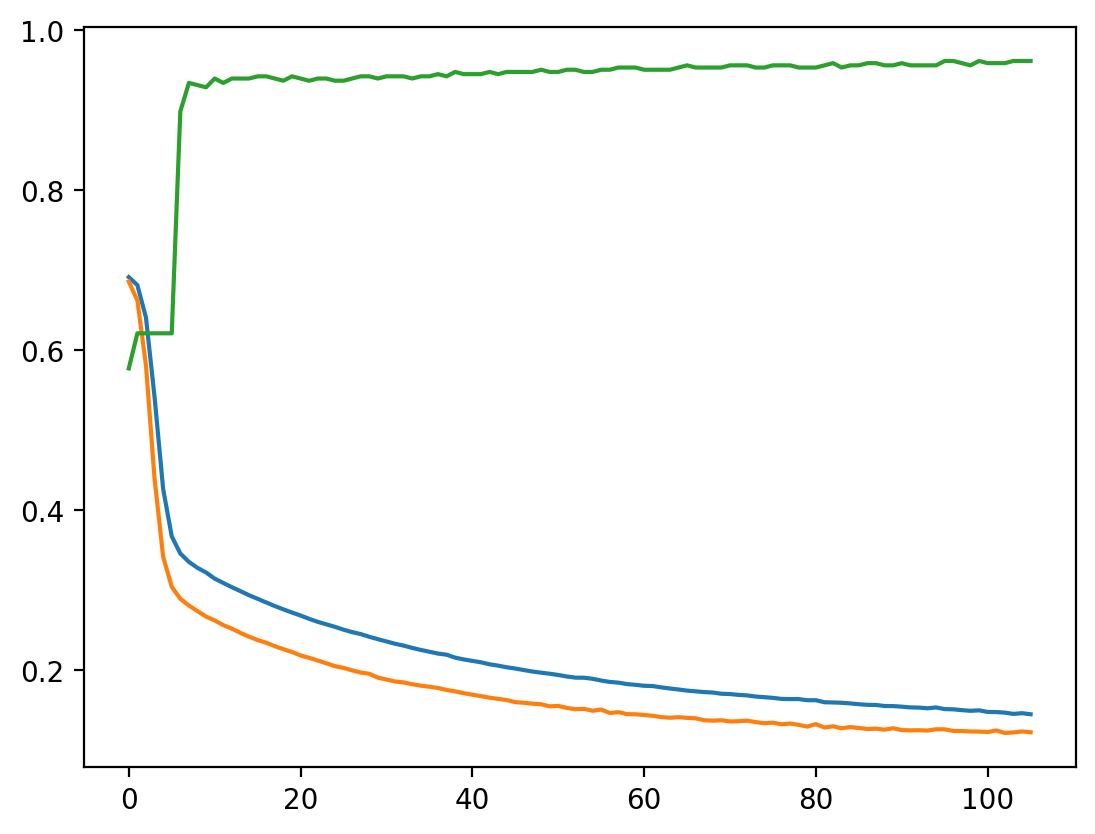

In [286]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history["accuracy"]);



### Train Accuracy : 96.04%
### Test Accuracy : 97.36%

In [268]:
# from mlxtend.plotting import plot_decision_regions

In [ ]:
# plot_decision_regions(X.values,y.values.astype(int),clf=model)

In [ ]:
# plot_decision_regions(X_test_trans,y_test.values.astype(int),clf=model)